## This script reads CESM2 Discharge data downloaded from Casper in NCAR (Fig 3)

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

import xarray as xr
import seaborn as sns
import warnings
from matplotlib import pyplot as plt 


## Read Lat, Lon data for the selected Domain processed from "GLADE" in Casper

### Lat

In [2]:
file_LatUs = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/discharge/mon/latsUsArr.npy'
#file_LatUs = 'https://github.com/rezaulg/CESM2-projection-Mississippi-discharge/blob/main/latsUsArr.npy'

lats_US = np.load(file_LatUs)
print(lats_US.shape)
print(lats_US)

(60,)
[24.75 25.25 25.75 26.25 26.75 27.25 27.75 28.25 28.75 29.25 29.75 30.25
 30.75 31.25 31.75 32.25 32.75 33.25 33.75 34.25 34.75 35.25 35.75 36.25
 36.75 37.25 37.75 38.25 38.75 39.25 39.75 40.25 40.75 41.25 41.75 42.25
 42.75 43.25 43.75 44.25 44.75 45.25 45.75 46.25 46.75 47.25 47.75 48.25
 48.75 49.25 49.75 50.25 50.75 51.25 51.75 52.25 52.75 53.25 53.75 54.25]


### Lon

In [3]:
file_LonUs = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/discharge/mon/lonsUsArr.npy'
lons_US = np.load(file_LonUs)
print(lons_US.shape)
print(lons_US)

(140,)
[-130.25 -129.75 -129.25 -128.75 -128.25 -127.75 -127.25 -126.75 -126.25
 -125.75 -125.25 -124.75 -124.25 -123.75 -123.25 -122.75 -122.25 -121.75
 -121.25 -120.75 -120.25 -119.75 -119.25 -118.75 -118.25 -117.75 -117.25
 -116.75 -116.25 -115.75 -115.25 -114.75 -114.25 -113.75 -113.25 -112.75
 -112.25 -111.75 -111.25 -110.75 -110.25 -109.75 -109.25 -108.75 -108.25
 -107.75 -107.25 -106.75 -106.25 -105.75 -105.25 -104.75 -104.25 -103.75
 -103.25 -102.75 -102.25 -101.75 -101.25 -100.75 -100.25  -99.75  -99.25
  -98.75  -98.25  -97.75  -97.25  -96.75  -96.25  -95.75  -95.25  -94.75
  -94.25  -93.75  -93.25  -92.75  -92.25  -91.75  -91.25  -90.75  -90.25
  -89.75  -89.25  -88.75  -88.25  -87.75  -87.25  -86.75  -86.25  -85.75
  -85.25  -84.75  -84.25  -83.75  -83.25  -82.75  -82.25  -81.75  -81.25
  -80.75  -80.25  -79.75  -79.25  -78.75  -78.25  -77.75  -77.25  -76.75
  -76.25  -75.75  -75.25  -74.75  -74.25  -73.75  -73.25  -72.75  -72.25
  -71.75  -71.25  -70.75  -70.25  -69.75  -6

## Using Monthly Data (Historical + Scen) for the US domain prepared from "GLADE" 

In [4]:
file_histSel_Us_ensMean = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/discharge/mon/monDischUsHistSelEnsMean.npy'
file_histSel_Us_ensMean_loaded = np.load(file_histSel_Us_ensMean)
print(file_histSel_Us_ensMean_loaded.shape)
maxVal = np.nanmax(file_histSel_Us_ensMean_loaded)
maxVal

(1020, 60, 140)


1.0000000000000002e+36

In [5]:
file_scen_Us_ensMean = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/discharge/mon/monDischUsScenEnsMean.npy'
file_scen_Us_ensMean_loaded = np.load(file_scen_Us_ensMean)
print(file_scen_Us_ensMean_loaded.shape)
maxVal = np.nanmax(file_scen_Us_ensMean_loaded)
maxVal

(1032, 60, 140)


1.0000000000000002e+36

## Concatenate the historical and scenario data arrays

In [6]:
disch_histSel_scen_Us_ensMean = np.concatenate((file_histSel_Us_ensMean_loaded, file_scen_Us_ensMean_loaded), axis=0)
print(disch_histSel_scen_Us_ensMean.shape)

(2052, 60, 140)


## The four time (1971-2000, 2015-2044, 2045-2074, and 2075-2100) slots

In [7]:
histYrSelSt = 1930

refPeriodYrSt = 1971
refPeriodYrEnd = 2000

scenYrSt = 2015
scenEraTwoYrSt = 2045
scenEraThreeYrSt = 2075

scenYrEnd = 2100

In [8]:
nYrsHistSelScen = scenYrEnd - histYrSelSt + 1
print(nYrsHistSelScen)

nMonsPerYr = 12     
print(nMonsPerYr)

171
12


### Coordinates at the outlet of the basins

In [9]:
# Missouri at Hermann
latTrgt_MissouriHermann = 38.71
lonTrgt_MissouriHermann = -91.44

# Arkansas at Murray Dam near Little Rock
latTrgt_ArkansasMurrayLittleRock = 34.79
lonTrgt_ArkansasMurrayLittleRock = -92.36

# Ohio at Olmsted
latTrgt_OhioOlmsted = 37.18
lonTrgt_OhioOlmsted = -89.06

# Mississippi at Vicksburg
latTrgt_MissiVicks = 32.32
lonTrgt_MissiVicks = -90.91


In [10]:
# Missouri at Hermann
latTrgtIndex_MissouriHermann = np.argmin( np.abs(lats_US - latTrgt_MissouriHermann))
lonTrgtIndex_MissouriHermann = np.argmin( np.abs(lons_US - lonTrgt_MissouriHermann))
print(latTrgtIndex_MissouriHermann, lonTrgtIndex_MissouriHermann)

# Arkansas at Murray Dam near Little Rock
latTrgtIndex_ArkansasMurrayLittleRock = np.argmin( np.abs(lats_US - latTrgt_ArkansasMurrayLittleRock))
lonTrgtIndex_ArkansasMurrayLittleRock = np.argmin( np.abs(lons_US - lonTrgt_ArkansasMurrayLittleRock))
print(latTrgtIndex_ArkansasMurrayLittleRock, lonTrgtIndex_ArkansasMurrayLittleRock)

# Ohio at Olmsted
latTrgtIndex_OhioOlmsted = np.argmin( np.abs(lats_US - latTrgt_OhioOlmsted))
lonTrgtIndex_OhioOlmsted = np.argmin( np.abs(lons_US - lonTrgt_OhioOlmsted))
print(latTrgtIndex_OhioOlmsted, lonTrgtIndex_OhioOlmsted)

# Mississippi at Vicksburg
latTrgtIndex_MissiVicks = np.argmin( np.abs(lats_US - latTrgt_MissiVicks))
lonTrgtIndex_MissiVicks = np.argmin( np.abs(lons_US - lonTrgt_MissiVicks))
print(latTrgtIndex_MissiVicks, lonTrgtIndex_MissiVicks)


28 78
20 76
25 82
15 79


In [11]:
print(disch_histSel_scen_Us_ensMean.shape)

(2052, 60, 140)


## Extracting discharge values at different outlet points

### Missouri at Hermann

In [12]:
disch_histSel_scen_ensMean_MissouriHermann = disch_histSel_scen_Us_ensMean[:, latTrgtIndex_MissouriHermann, lonTrgtIndex_MissouriHermann]
print(disch_histSel_scen_ensMean_MissouriHermann.shape)

disch_histSel_scen_ensMean_Yr_MissouriHermann = np.reshape(disch_histSel_scen_ensMean_MissouriHermann,(nYrsHistSelScen, nMonsPerYr))
print(disch_histSel_scen_ensMean_Yr_MissouriHermann.shape)


(2052,)
(171, 12)


### Arkansas at Murray Dam near Little Rock

In [13]:
disch_histSel_scen_ensMean_ArkansasMurrayLittleRock = disch_histSel_scen_Us_ensMean[:, latTrgtIndex_ArkansasMurrayLittleRock, lonTrgtIndex_ArkansasMurrayLittleRock]
print(disch_histSel_scen_ensMean_ArkansasMurrayLittleRock.shape)

disch_histSel_scen_ensMean_Yr_ArkansasMurrayLittleRock = np.reshape(disch_histSel_scen_ensMean_ArkansasMurrayLittleRock,(nYrsHistSelScen, nMonsPerYr))
print(disch_histSel_scen_ensMean_Yr_ArkansasMurrayLittleRock.shape)


(2052,)
(171, 12)


### Ohio River at Olmsted

In [14]:
disch_histSel_scen_ensMean_OhioOlmsted = disch_histSel_scen_Us_ensMean[:, latTrgtIndex_OhioOlmsted, lonTrgtIndex_OhioOlmsted]
print(disch_histSel_scen_ensMean_OhioOlmsted.shape)


disch_histSel_scen_ensMean_Yr_OhioOlmsted = np.reshape(disch_histSel_scen_ensMean_OhioOlmsted,(nYrsHistSelScen, nMonsPerYr))
print(disch_histSel_scen_ensMean_Yr_OhioOlmsted.shape)


(2052,)
(171, 12)


### Mississippi at Vicksburg

In [15]:
disch_histSel_scen_ensMean_MissiVicks = disch_histSel_scen_Us_ensMean[:, latTrgtIndex_MissiVicks, lonTrgtIndex_MissiVicks]
print(disch_histSel_scen_ensMean_MissiVicks.shape)


disch_histSel_scen_ensMean_Yr_MissiVicks=np.reshape(disch_histSel_scen_ensMean_MissiVicks,(nYrsHistSelScen, nMonsPerYr))
print(disch_histSel_scen_ensMean_Yr_MissiVicks.shape)


(2052,)
(171, 12)


## Subsetting the data into different periods / Eras

## Reference Period

In [16]:

refPeriodStepSt = refPeriodYrSt - histYrSelSt
refPeriodStepEnd = refPeriodYrEnd - histYrSelSt + 1

print(refPeriodStepSt, refPeriodStepEnd)
print(refPeriodStepEnd-refPeriodStepSt)

41 71
30


## Era1

In [17]:
scenEraOneStepSt = scenYrSt - histYrSelSt
scenEraOneStepEnd = scenEraTwoYrSt - histYrSelSt

print(scenEraOneStepSt, scenEraOneStepEnd)
print(scenEraOneStepEnd-scenEraOneStepSt)

85 115
30


## Era2

In [18]:
scenEraTwoStepSt = scenEraTwoYrSt - histYrSelSt
scenEraTwoStepEnd = scenEraThreeYrSt - histYrSelSt

print(scenEraTwoStepSt, scenEraTwoStepEnd)
print(scenEraTwoStepEnd-scenEraTwoStepSt)

115 145
30


## Era3

In [19]:
scenEraThreeStepSt = scenEraThreeYrSt - histYrSelSt
scenEraThreeStepEnd = scenYrEnd - histYrSelSt + 1

print(scenEraThreeStepSt, scenEraThreeStepEnd)
print(scenEraThreeStepEnd-scenEraThreeStepSt)

145 171
26


## Missouri at Hermann

In [20]:
disch_yrMon_refPeriod_ensMean_MissouriHermann = disch_histSel_scen_ensMean_Yr_MissouriHermann[refPeriodStepSt:refPeriodStepEnd,:]
print(disch_yrMon_refPeriod_ensMean_MissouriHermann.shape)

disch_yrMon_eraOne_ensMean_MissouriHermann = disch_histSel_scen_ensMean_Yr_MissouriHermann[scenEraOneStepSt:scenEraOneStepEnd,:]
print(disch_yrMon_eraOne_ensMean_MissouriHermann.shape)

disch_yrMon_eraTwo_ensMean_MissouriHermann = disch_histSel_scen_ensMean_Yr_MissouriHermann[scenEraTwoStepSt:scenEraTwoStepEnd,:]
print(disch_yrMon_eraTwo_ensMean_MissouriHermann.shape)

disch_yrMon_eraThree_ensMean_MissouriHermann = disch_histSel_scen_ensMean_Yr_MissouriHermann[scenEraThreeStepSt:scenEraThreeStepEnd,:]
print(disch_yrMon_eraThree_ensMean_MissouriHermann.shape)



(30, 12)
(30, 12)
(30, 12)
(26, 12)


In [21]:

disch_monClim_refPeriod_ensMean_MissouriHermann = np.nanmean(disch_yrMon_refPeriod_ensMean_MissouriHermann, axis = 0)
print(disch_monClim_refPeriod_ensMean_MissouriHermann.shape)

disch_monClim_eraOne_ensMean_MissouriHermann = np.nanmean(disch_yrMon_eraOne_ensMean_MissouriHermann, axis = 0)
print(disch_monClim_eraOne_ensMean_MissouriHermann.shape)

disch_monClim_eraTwo_ensMean_MissouriHermann = np.nanmean(disch_yrMon_eraTwo_ensMean_MissouriHermann, axis = 0)
print(disch_monClim_eraTwo_ensMean_MissouriHermann.shape)

disch_monClim_eraThree_ensMean_MissouriHermann = np.nanmean(disch_yrMon_eraThree_ensMean_MissouriHermann, axis = 0)
print(disch_monClim_eraThree_ensMean_MissouriHermann.shape)


(12,)
(12,)
(12,)
(12,)


## Arkansas at Murray Dam near Little Rock

In [22]:
disch_yrMon_refPeriod_ensMean_ArkansasMurrayLittleRock = disch_histSel_scen_ensMean_Yr_ArkansasMurrayLittleRock[refPeriodStepSt:refPeriodStepEnd,:]
print(disch_yrMon_refPeriod_ensMean_ArkansasMurrayLittleRock.shape)

disch_yrMon_eraOne_ensMean_ArkansasMurrayLittleRock = disch_histSel_scen_ensMean_Yr_ArkansasMurrayLittleRock[scenEraOneStepSt:scenEraOneStepEnd,:]
print(disch_yrMon_eraOne_ensMean_ArkansasMurrayLittleRock.shape)

disch_yrMon_eraTwo_ensMean_ArkansasMurrayLittleRock = disch_histSel_scen_ensMean_Yr_ArkansasMurrayLittleRock[scenEraTwoStepSt:scenEraTwoStepEnd,:]
print(disch_yrMon_eraTwo_ensMean_ArkansasMurrayLittleRock.shape)

disch_yrMon_eraThree_ensMean_ArkansasMurrayLittleRock = disch_histSel_scen_ensMean_Yr_ArkansasMurrayLittleRock[scenEraThreeStepSt:scenEraThreeStepEnd,:]
print(disch_yrMon_eraThree_ensMean_ArkansasMurrayLittleRock.shape)



(30, 12)
(30, 12)
(30, 12)
(26, 12)


In [23]:

disch_monClim_refPeriod_ensMean_ArkansasMurrayLittleRock = np.nanmean(disch_yrMon_refPeriod_ensMean_ArkansasMurrayLittleRock, axis = 0)
print(disch_monClim_refPeriod_ensMean_ArkansasMurrayLittleRock.shape)

disch_monClim_eraOne_ensMean_ArkansasMurrayLittleRock = np.nanmean(disch_yrMon_eraOne_ensMean_ArkansasMurrayLittleRock, axis = 0)
print(disch_monClim_eraOne_ensMean_ArkansasMurrayLittleRock.shape)

disch_monClim_eraTwo_ensMean_ArkansasMurrayLittleRock = np.nanmean(disch_yrMon_eraTwo_ensMean_ArkansasMurrayLittleRock, axis = 0)
print(disch_monClim_eraTwo_ensMean_ArkansasMurrayLittleRock.shape)

disch_monClim_eraThree_ensMean_ArkansasMurrayLittleRock = np.nanmean(disch_yrMon_eraThree_ensMean_ArkansasMurrayLittleRock, axis = 0)
print(disch_monClim_eraThree_ensMean_ArkansasMurrayLittleRock.shape)


(12,)
(12,)
(12,)
(12,)


## Ohio River at Olmsted

In [24]:
disch_yrMon_refPeriod_ensMean_OhioOlmsted = disch_histSel_scen_ensMean_Yr_OhioOlmsted[refPeriodStepSt:refPeriodStepEnd,:]
print(disch_yrMon_refPeriod_ensMean_OhioOlmsted.shape)

disch_yrMon_eraOne_ensMean_OhioOlmsted = disch_histSel_scen_ensMean_Yr_OhioOlmsted[scenEraOneStepSt:scenEraOneStepEnd,:]
print(disch_yrMon_eraOne_ensMean_OhioOlmsted.shape)

disch_yrMon_eraTwo_ensMean_OhioOlmsted = disch_histSel_scen_ensMean_Yr_OhioOlmsted[scenEraTwoStepSt:scenEraTwoStepEnd,:]
print(disch_yrMon_eraTwo_ensMean_OhioOlmsted.shape)

disch_yrMon_eraThree_ensMean_OhioOlmsted = disch_histSel_scen_ensMean_Yr_OhioOlmsted[scenEraThreeStepSt:scenEraThreeStepEnd,:]
print(disch_yrMon_eraThree_ensMean_OhioOlmsted.shape)



(30, 12)
(30, 12)
(30, 12)
(26, 12)


In [25]:

disch_monClim_refPeriod_ensMean_OhioOlmsted = np.nanmean(disch_yrMon_refPeriod_ensMean_OhioOlmsted, axis = 0)
print(disch_monClim_refPeriod_ensMean_OhioOlmsted.shape)

disch_monClim_eraOne_ensMean_OhioOlmsted = np.nanmean(disch_yrMon_eraOne_ensMean_OhioOlmsted, axis = 0)
print(disch_monClim_eraOne_ensMean_OhioOlmsted.shape)

disch_monClim_eraTwo_ensMean_OhioOlmsted = np.nanmean(disch_yrMon_eraTwo_ensMean_OhioOlmsted, axis = 0)
print(disch_monClim_eraTwo_ensMean_OhioOlmsted.shape)

disch_monClim_eraThree_ensMean_OhioOlmsted = np.nanmean(disch_yrMon_eraThree_ensMean_OhioOlmsted, axis = 0)
print(disch_monClim_eraThree_ensMean_OhioOlmsted.shape)


(12,)
(12,)
(12,)
(12,)


## Mississippi River at Vicksburg

In [26]:
disch_yrMon_refPeriod_ensMean_MissiVicks = disch_histSel_scen_ensMean_Yr_MissiVicks[refPeriodStepSt:refPeriodStepEnd,:]
print(disch_yrMon_refPeriod_ensMean_MissiVicks.shape)

disch_yrMon_eraOne_ensMean_MissiVicks = disch_histSel_scen_ensMean_Yr_MissiVicks[scenEraOneStepSt:scenEraOneStepEnd,:]
print(disch_yrMon_eraOne_ensMean_MissiVicks.shape)

disch_yrMon_eraTwo_ensMean_MissiVicks = disch_histSel_scen_ensMean_Yr_MissiVicks[scenEraTwoStepSt:scenEraTwoStepEnd,:]
print(disch_yrMon_eraTwo_ensMean_MissiVicks.shape)

disch_yrMon_eraThree_ensMean_MissiVicks = disch_histSel_scen_ensMean_Yr_MissiVicks[scenEraThreeStepSt:scenEraThreeStepEnd,:]
print(disch_yrMon_eraThree_ensMean_MissiVicks.shape)



(30, 12)
(30, 12)
(30, 12)
(26, 12)


In [27]:

disch_monClim_refPeriod_ensMean_MissiVicks = np.nanmean(disch_yrMon_refPeriod_ensMean_MissiVicks, axis = 0)
print(disch_monClim_refPeriod_ensMean_MissiVicks.shape)

disch_monClim_eraOne_ensMean_MissiVicks = np.nanmean(disch_yrMon_eraOne_ensMean_MissiVicks, axis = 0)
print(disch_monClim_eraOne_ensMean_MissiVicks.shape)

disch_monClim_eraTwo_ensMean_MissiVicks = np.nanmean(disch_yrMon_eraTwo_ensMean_MissiVicks, axis = 0)
print(disch_monClim_eraTwo_ensMean_MissiVicks.shape)

disch_monClim_eraThree_ensMean_MissiVicks = np.nanmean(disch_yrMon_eraThree_ensMean_MissiVicks, axis = 0)
print(disch_monClim_eraThree_ensMean_MissiVicks.shape)


(12,)
(12,)
(12,)
(12,)


## Percent change relative to Historical Reference Period

### Missouri

In [28]:
print(disch_monClim_refPeriod_ensMean_MissouriHermann.shape)
print(disch_monClim_eraOne_ensMean_MissouriHermann.shape)
print(disch_monClim_eraTwo_ensMean_MissouriHermann.shape)
print(disch_monClim_eraThree_ensMean_MissouriHermann.shape)


(12,)
(12,)
(12,)
(12,)


In [29]:
disch_percCh_monClim_eraOne_ensMean_MissouriHermann = (disch_monClim_eraOne_ensMean_MissouriHermann-disch_monClim_refPeriod_ensMean_MissouriHermann)/disch_monClim_refPeriod_ensMean_MissouriHermann*100
print(disch_percCh_monClim_eraOne_ensMean_MissouriHermann)
print('')
maxPercCh_eraOne_MissouriHermann = np.nanmax(disch_percCh_monClim_eraOne_ensMean_MissouriHermann)
minPercCh_eraOne_MissouriHermann = np.nanmin(disch_percCh_monClim_eraOne_ensMean_MissouriHermann)

print(maxPercCh_eraOne_MissouriHermann)
print(minPercCh_eraOne_MissouriHermann)


[ -3.9560132   -0.417961    -1.15300913  -7.97944646 -17.250192
  -8.67410436 -11.34635558  -6.98415717   2.72670338  -4.87869839
  -6.50506192  -4.87096468]

2.7267033785562953
-17.250192002390747


In [30]:
disch_percCh_monClim_eraTwo_ensMean_MissouriHermann = (disch_monClim_eraTwo_ensMean_MissouriHermann-disch_monClim_refPeriod_ensMean_MissouriHermann)/disch_monClim_refPeriod_ensMean_MissouriHermann*100
print(disch_percCh_monClim_eraTwo_ensMean_MissouriHermann)
print('')
maxPercCh_eraTwo_MissouriHermann = np.nanmax(disch_percCh_monClim_eraTwo_ensMean_MissouriHermann)
minPercCh_eraTwo_MissouriHermann = np.nanmin(disch_percCh_monClim_eraTwo_ensMean_MissouriHermann)

print(maxPercCh_eraTwo_MissouriHermann)
print(minPercCh_eraTwo_MissouriHermann)


[ -1.53073636   3.40801417   2.50231323 -13.31481706 -23.10998582
  -8.17363171  -9.64306489   0.86111037   5.77739201  -3.86231676
  -5.15846117  -2.35375092]

5.7773920108311625
-23.109985816251104


In [31]:
disch_percCh_monClim_eraThree_ensMean_MissouriHermann = (disch_monClim_eraThree_ensMean_MissouriHermann-disch_monClim_refPeriod_ensMean_MissouriHermann)/disch_monClim_refPeriod_ensMean_MissouriHermann*100
print(disch_percCh_monClim_eraThree_ensMean_MissouriHermann)
print('')
maxPercCh_eraThree_MissouriHermann = np.nanmax(disch_percCh_monClim_eraThree_ensMean_MissouriHermann)
minPercCh_eraThree_MissouriHermann = np.nanmin(disch_percCh_monClim_eraThree_ensMean_MissouriHermann)

print(maxPercCh_eraThree_MissouriHermann)
print(minPercCh_eraThree_MissouriHermann)


[  6.94451647  11.65956682   7.97879895 -17.23161204 -21.24633013
  -3.95578247  -5.62943348  12.40307336  12.35464612   2.13658262
   1.24640085   4.98109927]

12.403073358506363
-21.246330134958168


## Arkansas

In [32]:
print(disch_monClim_refPeriod_ensMean_ArkansasMurrayLittleRock.shape)
print(disch_monClim_eraOne_ensMean_ArkansasMurrayLittleRock.shape)
print(disch_monClim_eraTwo_ensMean_ArkansasMurrayLittleRock.shape)
print(disch_monClim_eraThree_ensMean_ArkansasMurrayLittleRock.shape)

#print(dischObsMonClim_ArkansasMurrayLittleRock.shape)


(12,)
(12,)
(12,)
(12,)


In [33]:
disch_percCh_monClim_eraOne_ensMean_ArkansasMurrayLittleRock = (disch_monClim_eraOne_ensMean_ArkansasMurrayLittleRock-disch_monClim_refPeriod_ensMean_ArkansasMurrayLittleRock)/disch_monClim_refPeriod_ensMean_ArkansasMurrayLittleRock*100
print(disch_percCh_monClim_eraOne_ensMean_ArkansasMurrayLittleRock)
print('')
maxPercCh_eraOne_ArkansasMurrayLittleRock = np.nanmax(disch_percCh_monClim_eraOne_ensMean_ArkansasMurrayLittleRock)
minPercCh_eraOne_ArkansasMurrayLittleRock = np.nanmin(disch_percCh_monClim_eraOne_ensMean_ArkansasMurrayLittleRock)

print(maxPercCh_eraOne_ArkansasMurrayLittleRock)
print(minPercCh_eraOne_ArkansasMurrayLittleRock)


[-11.49216418 -11.97736554  -9.98536194  -7.89889002  -9.23815323
 -11.08472576 -13.99635743  -5.11053739  -9.22535311  -9.13998803
  -9.72323508 -10.18540267]

-5.110537394690868
-13.996357430838845


In [34]:
disch_percCh_monClim_eraTwo_ensMean_ArkansasMurrayLittleRock = (disch_monClim_eraTwo_ensMean_ArkansasMurrayLittleRock-disch_monClim_refPeriod_ensMean_ArkansasMurrayLittleRock)/disch_monClim_refPeriod_ensMean_ArkansasMurrayLittleRock*100
print(disch_percCh_monClim_eraTwo_ensMean_ArkansasMurrayLittleRock)
print('')
maxPercCh_eraTwo_ArkansasMurrayLittleRock = np.nanmax(disch_percCh_monClim_eraTwo_ensMean_ArkansasMurrayLittleRock)
minPercCh_eraTwo_ArkansasMurrayLittleRock = np.nanmin(disch_percCh_monClim_eraTwo_ensMean_ArkansasMurrayLittleRock)

print(maxPercCh_eraTwo_ArkansasMurrayLittleRock)
print(minPercCh_eraTwo_ArkansasMurrayLittleRock)


[-8.30137916 -9.28372068 -6.97625281 -3.63233592 -2.73958852 -4.99698848
 -3.3356589   9.95245825 -5.45334534 -6.97978754 -7.38521515 -6.86680539]

9.952458254586812
-9.283720682872646


In [35]:
disch_percCh_monClim_eraThree_ensMean_ArkansasMurrayLittleRock = (disch_monClim_eraThree_ensMean_ArkansasMurrayLittleRock-disch_monClim_refPeriod_ensMean_ArkansasMurrayLittleRock)/disch_monClim_refPeriod_ensMean_ArkansasMurrayLittleRock*100
print(disch_percCh_monClim_eraThree_ensMean_ArkansasMurrayLittleRock)
print('')
maxPercCh_eraThree_ArkansasMurrayLittleRock = np.nanmax(disch_percCh_monClim_eraThree_ensMean_ArkansasMurrayLittleRock)
minPercCh_eraThree_ArkansasMurrayLittleRock = np.nanmin(disch_percCh_monClim_eraThree_ensMean_ArkansasMurrayLittleRock)

print(maxPercCh_eraThree_ArkansasMurrayLittleRock)
print(minPercCh_eraThree_ArkansasMurrayLittleRock)


[-5.64099235 -8.20085984 -4.81254191 -2.71485023  0.31271203 -1.73740213
  6.74263232 21.34070997 -1.34791811 -3.08541433 -3.99341723 -4.38766283]

21.340709968228925
-8.20085984380405


## Ohio at Olmsted

In [36]:
print(disch_monClim_refPeriod_ensMean_OhioOlmsted.shape)
print(disch_monClim_eraOne_ensMean_OhioOlmsted.shape)
print(disch_monClim_eraTwo_ensMean_OhioOlmsted.shape)
print(disch_monClim_eraThree_ensMean_OhioOlmsted.shape)


(12,)
(12,)
(12,)
(12,)


In [37]:
disch_percCh_monClim_eraOne_ensMean_OhioOlmsted = (disch_monClim_eraOne_ensMean_OhioOlmsted-disch_monClim_refPeriod_ensMean_OhioOlmsted)/disch_monClim_refPeriod_ensMean_OhioOlmsted*100
print(disch_percCh_monClim_eraOne_ensMean_OhioOlmsted)
print('')
maxPercCh_eraOne_OhioOlmsted = np.nanmax(disch_percCh_monClim_eraOne_ensMean_OhioOlmsted)
minPercCh_eraOne_OhioOlmsted = np.nanmin(disch_percCh_monClim_eraOne_ensMean_OhioOlmsted)

print(maxPercCh_eraOne_OhioOlmsted)
print(minPercCh_eraOne_OhioOlmsted)


[  0.98803489   4.95630331   2.63986904 -10.02536309 -12.77004738
  -1.52932666  -4.35218889  -2.53076201   3.68515449  -0.27948304
  -1.0526196   -0.43685529]

4.956303306317254
-12.77004738269011


In [38]:
disch_percCh_monClim_eraTwo_ensMean_OhioOlmsted = (disch_monClim_eraTwo_ensMean_OhioOlmsted-disch_monClim_refPeriod_ensMean_OhioOlmsted)/disch_monClim_refPeriod_ensMean_OhioOlmsted*100
print(disch_percCh_monClim_eraTwo_ensMean_OhioOlmsted)
print('')
maxPercCh_eraTwo_OhioOlmsted = np.nanmax(disch_percCh_monClim_eraTwo_ensMean_OhioOlmsted)
minPercCh_eraTwo_OhioOlmsted = np.nanmin(disch_percCh_monClim_eraTwo_ensMean_OhioOlmsted)

print(maxPercCh_eraTwo_OhioOlmsted)
print(minPercCh_eraTwo_OhioOlmsted)


[  6.42651044  11.0495541    6.1741391  -15.33830091 -14.5753278
   3.37563654   0.22389648   4.81890669   8.82415074   3.41605236
   3.07965817   5.01299587]

11.049554101120515
-15.338300914561056


In [39]:
disch_percCh_monClim_eraThree_ensMean_OhioOlmsted = (disch_monClim_eraThree_ensMean_OhioOlmsted-disch_monClim_refPeriod_ensMean_OhioOlmsted)/disch_monClim_refPeriod_ensMean_OhioOlmsted*100
print(disch_percCh_monClim_eraThree_ensMean_OhioOlmsted)
print('')
maxPercCh_eraThree_OhioOlmsted = np.nanmax(disch_percCh_monClim_eraThree_ensMean_OhioOlmsted)
minPercCh_eraThree_OhioOlmsted = np.nanmin(disch_percCh_monClim_eraThree_ensMean_OhioOlmsted)

print(maxPercCh_eraThree_OhioOlmsted)
print(minPercCh_eraThree_OhioOlmsted)


[ 15.94681854  19.59890484  10.22997643 -18.50381673 -10.26554827
  10.18133929   6.00204428  14.31526995  15.24528095   9.61698851
  10.09664994  12.62668202]

19.59890483607522
-18.503816728958927


## Mississippi at Vicksburg

In [40]:
print(disch_monClim_refPeriod_ensMean_MissiVicks.shape)
print(disch_monClim_eraOne_ensMean_MissiVicks.shape)
print(disch_monClim_eraTwo_ensMean_MissiVicks.shape)
print(disch_monClim_eraThree_ensMean_MissiVicks.shape)


(12,)
(12,)
(12,)
(12,)


In [41]:
disch_percCh_monClim_eraOne_ensMean_MissiVicks = (disch_monClim_eraOne_ensMean_MissiVicks-disch_monClim_refPeriod_ensMean_MissiVicks)/disch_monClim_refPeriod_ensMean_MissiVicks*100
print(disch_percCh_monClim_eraOne_ensMean_MissiVicks)
print('')
maxPercCh_eraOne_MissiVicks = np.nanmax(disch_percCh_monClim_eraOne_ensMean_MissiVicks)
minPercCh_eraOne_MissiVicks = np.nanmin(disch_percCh_monClim_eraOne_ensMean_MissiVicks)

print(maxPercCh_eraOne_MissiVicks)
print(minPercCh_eraOne_MissiVicks)


[ 1.17701093  3.36291611  0.16039276 -4.95232979 -5.51233409 -1.9810531
 -3.22442087 -0.06497738  0.32976214 -0.39469904 -1.41969194 -0.70701853]

3.3629161136960026
-5.512334086636112


In [42]:
disch_percCh_monClim_eraTwo_ensMean_MissiVicks = (disch_monClim_eraTwo_ensMean_MissiVicks-disch_monClim_refPeriod_ensMean_MissiVicks)/disch_monClim_refPeriod_ensMean_MissiVicks*100
print(disch_percCh_monClim_eraTwo_ensMean_MissiVicks)
print('')
maxPercCh_eraTwo_MissiVicks = np.nanmax(disch_percCh_monClim_eraTwo_ensMean_MissiVicks)
minPercCh_eraTwo_MissiVicks = np.nanmin(disch_percCh_monClim_eraTwo_ensMean_MissiVicks)

print(maxPercCh_eraTwo_MissiVicks)
print(minPercCh_eraTwo_MissiVicks)


[10.78999696 11.39532956  6.19920727 -2.39393841 -2.38357152  2.98921019
  1.97375009  6.64793548  5.09798928  2.71931027  3.50880423  6.75728255]

11.395329558359922
-2.393938406850445


In [43]:
disch_percCh_monClim_eraThree_ensMean_MissiVicks = (disch_monClim_eraThree_ensMean_MissiVicks-disch_monClim_refPeriod_ensMean_MissiVicks)/disch_monClim_refPeriod_ensMean_MissiVicks*100
print(disch_percCh_monClim_eraThree_ensMean_MissiVicks)
print('')
maxPercCh_eraThree_MissiVicks = np.nanmax(disch_percCh_monClim_eraThree_ensMean_MissiVicks)
minPercCh_eraThree_MissiVicks = np.nanmin(disch_percCh_monClim_eraThree_ensMean_MissiVicks)

print(maxPercCh_eraThree_MissiVicks)
print(minPercCh_eraThree_MissiVicks)


[20.53875796 20.3039239  11.82348753  0.47528169  3.53501498  8.26103792
  7.84807558 15.55369153 10.83309111  7.90833843  9.59293741 14.70533676]

20.538757958170184
0.4752816939895204


## Plotting the percent change discharge climatology relative to Historical Referenc period climatology

In [44]:
monsStr = 'Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec'
print(monsStr)

('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')


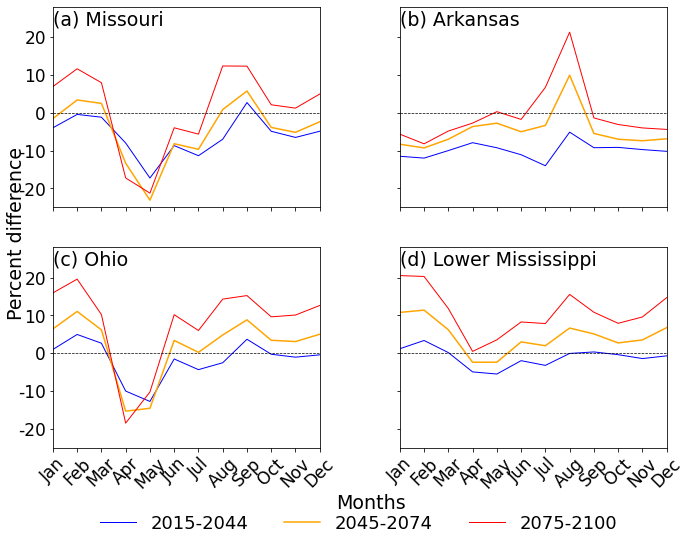

In [45]:

#%matplotlib notebook


tickFontSize = 17
textFontSize = 19
legendFontSize = 18
titleFontSize = 19


linewidth = 0.8
dashLinewidth = 0.7

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
fig = plt.figure(figsize=(11, 9), constrained_layout=False)

axs = [plt.subplot(2, 2, x + 1,) for x in range(4)]
ax1 = axs[0]

ln12=ax1.plot(range(nMonsPerYr), disch_percCh_monClim_eraOne_ensMean_MissouriHermann, label="2015-2044", color = 'blue', linewidth=1)
ln13=ax1.plot(range(nMonsPerYr), disch_percCh_monClim_eraTwo_ensMean_MissouriHermann, label="2045-2074", color = 'orange', linewidth=1.5)
ln14=ax1.plot(range(nMonsPerYr), disch_percCh_monClim_eraThree_ensMean_MissouriHermann, label="2075-2100", color = 'red', linewidth=1)
ln16 = ax1.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=0.7)

ax1.set_title('(a) Missouri', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')
ax1.set_xticks(range(nMonsPerYr))
ax1.set_xticklabels(monsStr, minor=False)
ax1.set_xticklabels('', )

ax1.set_yticks([-20, -10, 0, 10, 20]) 
ax1.set_yticklabels(['-20', '-10', '0', '10', '20'],  fontsize = tickFontSize) 


ax1.set_xlim([0, 11])
ax1.set_ylim([-25, 28])

ax1.set_xlabel('')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax2 = axs[1]
ln22=ax2.plot(range(nMonsPerYr), disch_percCh_monClim_eraOne_ensMean_ArkansasMurrayLittleRock, label="2015-2044", color = 'blue', linewidth=1)
ln23=ax2.plot(range(nMonsPerYr), disch_percCh_monClim_eraTwo_ensMean_ArkansasMurrayLittleRock, label="2045-2074", color = 'orange', linewidth=1.5)
ln24=ax2.plot(range(nMonsPerYr), disch_percCh_monClim_eraThree_ensMean_ArkansasMurrayLittleRock, label="2075-2100", color = 'red', linewidth=1)
ln26 = ax2.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=0.7)

ax2.set_title('(b) Arkansas', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')

ax2.set_xticks(range(nMonsPerYr))
ax2.set_xticklabels(monsStr, minor=False)
ax2.set_xticklabels('', )

ax2.set_yticks([-20, -10, 0, 10, 20]) 
ax2.set_yticklabels(['-20', '-10', '0', '10', '20'],  fontsize = tickFontSize) 
ax2.set_yticklabels('', )

ax2.set_xlim([0, 11])
ax2.set_ylim([-25, 28])

ax2.set_xlabel('')
ax2.set_ylabel('')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax3 = axs[2]
ln32=ax3.plot(range(nMonsPerYr), disch_percCh_monClim_eraOne_ensMean_OhioOlmsted, label="2015-2044", color = 'blue', linewidth=1)
ln33=ax3.plot(range(nMonsPerYr), disch_percCh_monClim_eraTwo_ensMean_OhioOlmsted, label="2045-2074", color = 'orange', linewidth=1.5)
ln34=ax3.plot(range(nMonsPerYr), disch_percCh_monClim_eraThree_ensMean_OhioOlmsted, label="2075-2100", color = 'red', linewidth=1)
ln36 = ax3.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=0.7)

ax3.set_title('(c) Ohio', y=0.98, pad=-14, fontsize =  titleFontSize, loc='left')

ax3.set_xticks(range(nMonsPerYr))
ax3.set_xticklabels(monsStr, minor=False)
ax3.set_xticklabels(monsStr, minor=False, rotation = 45,  fontsize = tickFontSize)

ax3.set_yticks([-20, -10, 0, 10, 20]) 
ax3.set_yticklabels(['-20', '-10', '0', '10', '20'],  fontsize = tickFontSize) 


ax3.set_xlim([0, 11])
ax3.set_ylim([-25, 28])

ax3.set_ylabel('Percent difference', fontsize = textFontSize )
ax3.yaxis.set_label_coords(-0.10, +1.07)

ax3.set_xlabel('')
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++


ax4 = axs[3]
ln42=ax4.plot(range(nMonsPerYr), disch_percCh_monClim_eraOne_ensMean_MissiVicks, label="2015-2044", color = 'blue', linewidth=1)
ln43=ax4.plot(range(nMonsPerYr), disch_percCh_monClim_eraTwo_ensMean_MissiVicks, label="2045-2074", color = 'orange', linewidth=1.5)
ln44=ax4.plot(range(nMonsPerYr), disch_percCh_monClim_eraThree_ensMean_MissiVicks, label="2075-2100", color = 'red', linewidth=1)
ln46 = ax4.axhline(y = 0, color = 'k', label = '', linestyle='--', linewidth=0.7)

ax4.set_title('(d) Lower Mississippi', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')

ax4.set_xticks(range(nMonsPerYr))
ax4.set_xticklabels(monsStr, minor=False, rotation = 45,  fontsize = tickFontSize)

ax4.set_yticks([-20, -10, 0, 10, 20]) 
ax4.set_yticklabels(['-20', '-10', '0', '10', '20'],  fontsize = tickFontSize) 
ax4.set_yticklabels('', )

ax4.set_xlim([0, 11])
ax4.set_ylim([-25, 28])

ax4.set_xlabel('Months', fontsize = textFontSize )
ax4.xaxis.set_label_coords(-0.11, -0.23)
ax4.legend(ncol=3, loc=(-1.15, -0.46),frameon=False, fontsize=legendFontSize)

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
#st = fig.suptitle("Annual cycle at a gage-station per basin", fontsize = 20)
#st.set_y(0.92)
#st.set_x(0.515)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)

plt.subplots_adjust(wspace=0.3, bottom=0.2)

plt.show()

In [46]:
STOP here ============

SyntaxError: invalid syntax (<ipython-input-46-76345b92dc7b>, line 1)